## Logistic Regression

trying to predict if someone will have breast cancer or not

In [3]:
# import dataset
from sklearn import datasets
import pandas as pd
import seaborn as sns

# import the breast cancer dataset
breast_cancer = datasets.load_breast_cancer()

# create my dataframe
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = pd.Series(breast_cancer.target)

# map in the target names
df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})

# check our data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [46]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# import train_test_split
from sklearn.model_selection import train_test_split

# split the data 
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

# instantiate the model
log_reg = LogisticRegression(max_iter=2100) # max_iter is the number of repetitions that the model will do

# fit the model
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

In [43]:
# check the accuracy
from sklearn.metrics import accuracy_score

print("Test Data Model Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100),4))

Test Data Model Accuracy: 90


In [44]:
# check the train data accuracy
y_pred_train = log_reg.predict(X_train)

print("Train Data Model Accuracy: {}".format(round(accuracy_score(y_train, y_pred_train)*100),4))

Train Data Model Accuracy: 96


In [24]:
# pick a random sample from the test data
sample = df.sample(1)

# predict the sample
sample_pred = log_reg.predict(sample.drop('target', axis=1))

# print the prediction
print("Sample Prediction: {}".format(sample_pred[0]))
# print the actual value
print("Actual Value: {}".format(sample['target'].values[0]))

Sample Prediction: benign
Actual Value: benign


### How does PCA affect the accuracy of the model?

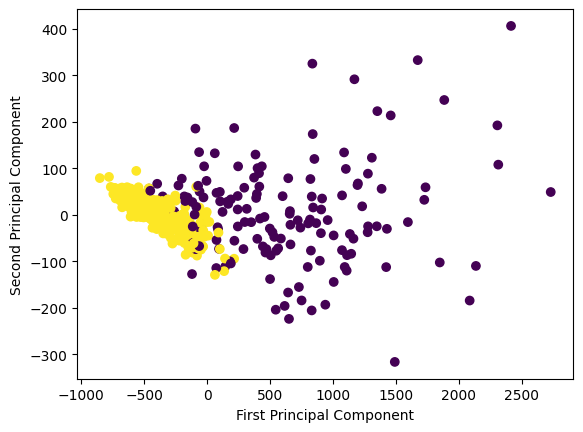

In [32]:
# import PCA
from sklearn.decomposition import PCA

# instantiate PCA
pca = PCA(n_components=2)

# fit PCA
pca.fit(X_train)

# transform the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot a scatter plot of the two principal components 
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=list(map(lambda x: 0 if x=='malignant' else 1, y_train)), cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [36]:
# fit a logistic regression model on the transformed data
log_reg_pca = LogisticRegression()#max_iter=3000)
log_reg_pca.fit(X_train_pca, y_train)

# make predictions
y_pred_pca = log_reg_pca.predict(X_test_pca)

# check the accuracy
print("Test Data Model Accuracy (PCA): {}".format(round(accuracy_score(y_test, y_pred_pca)*100),4))
print("Train Data Model Accuracy (PCA): {}".format(round(accuracy_score(y_train, log_reg_pca.predict(X_train_pca))*100),4))

Test Data Model Accuracy (PCA): 92
Train Data Model Accuracy (PCA): 93


In [35]:
# Print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.98628295 0.01286859]


## Importing datasets from sklearn

## Importing datasets from sklearn

In [1]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Check the type of the loaded object (usually a Bunch)
print(type(iris))  # Returns: <class 'sklearn.utils.Bunch'>

# Available keys in the dataset
print(iris.keys())  # Returns: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Description of the dataset
print(iris.DESCR)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 1.00


In [3]:
# Ml is only 20% of the work. The rest is data cleaning and preparation
# This means you will to revisit the basics of python and pandas